In [1]:
'''
3장 실습
'''
#영화리뷰
#데이터 불러오기
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#정수 시퀀스를 이진행렬로  원핫인코딩하기

import numpy as np
def vactorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vactorize_sequences(train_data)
x_test=vactorize_sequences(test_data)

In [3]:
#레이블 원핫 인코딩(이진분류 레이블은 그 자체가 원핫이므로 asarray만을 써도 ok)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


1.0

In [4]:
#모델정의하기(2차원 텐서가 데이터로 들어가므로 Dense& 활성화 함수 relu이용)
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) #하나의 샘플당 10000개의 원소
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#이진분류는 샘플당 차원1의 확률 스칼라를 반환 하므로 sigmoid활성화 함수 적당

In [5]:
#모델컴파일 하기
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',#이진 분류 cross_entropy(확률의 차이!)
             metrics=['accuracy'])

In [6]:
#검증세트 준비하기(10000개 샘플 떼어내기)

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [7]:
#모델 훈련
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])
history=model.fit(partial_x_train,partial_y_train,
                 epochs=20,
                 batch_size=512,#Q한번의 에포그에서 512번의 배치사이즈로 경사하강 하는 거??
                 validation_data=(x_val,y_val))#이거는 테스트 용 학습에 연관 X

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 685us/step - loss: 0.5085 - acc: 0.7814 - val_loss: 0.3796 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 8s 566us/step - loss: 0.3005 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 8s 545us/step - loss: 0.2179 - acc: 0.9284 - val_loss: 0.3082 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 8s 528us/step - loss: 0.1751 - acc: 0.9436 - val_loss: 0.2837 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 8s 519us/step - loss: 0.1427 - acc: 0.9544 - val_loss: 0.2841 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 8s 527us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3155 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 8s 554us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 -

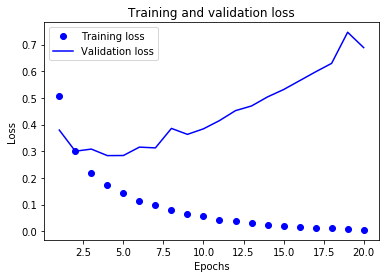

In [8]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss) +1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
      
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
      
plt.show()

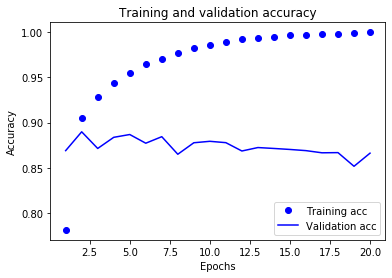

In [10]:
plt.clf() #그래프 초기화
acc=history_dict['acc']
val_acc=history_dict["val_acc"]

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#위 그래프 봤을때 에포크 4번까지가 좋음->처음부터 다시 훈련
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) #하나의 샘플당 10000개의 원소
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,y_train,
                 epochs=4,
                 batch_size=512)

result=model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 12s 478us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 9s 368us/step - loss: 0.2628 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 8s 335us/step - loss: 0.2004 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 11s 431us/step


In [14]:
result

[0.3020179143047333, 0.8808]

In [15]:
model.predict(x_test)

array([[0.21721274],
       [0.99954236],
       [0.9383143 ],
       ...,
       [0.15096414],
       [0.10364115],
       [0.7171019 ]], dtype=float32)

In [16]:
'''
다중분류->뉴스기사 분류
'''
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)



2113536/2110848 [==============================] - 15s 7us/step


In [23]:
#데이터 인고딩 (리스트 ->np의 벡터로)


import numpy as np

def vactorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vactorize_sequences(train_data)
x_test=vactorize_sequences(test_data)

In [24]:
#레이블 인코딩 (이전엔 이미 이진분류(단일분류)레이블인데 비해 이건 다중분류이므로! np.asarray()말고 to_one_hot이용 )
#이걸 위의 예제와 같이 np.array로 바꾸면 [3,2,1,..]이런식으로 표현 되므로(다중분류)
#이건 데이터 인코딩과 똑같이 해주어야 함
def to_one_hot(labels,dimension=10000):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [25]:
#이미 케라스에 위에 대해 내장함수 존재
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [26]:
#내 호기심 그럼 위의 샘플 데이터 인코딩은..?
##x_train=to_categorical(train_data)
#x_test=to_categorical(test_data)
#이거 안됌 대신 to_one_hot은 매개변수 이름만 바뀐거니까 가능

In [29]:
#모델정의

from keras import models
#import keras.layers 이렇게 적으면 말 그대로 keras.layers 를 가져와서 layers쓸떄 마다 keras.layers를 통채로 입력해야함.. 따라서
from keras  import layers  #  라 하자

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))#다중분류 시그마(46개의 클래스)=1


In [30]:
#정의된 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy', # 이진분류 binary 다중 분류 categorical
             metrics=['acc'])

In [31]:
#훈련검증

x_val=x_train[:1000]
partial_x_val=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_val=one_hot_train_labels[1000:]

In [32]:
#모델 훈련

history=model.fit(partial_x_val,partial_y_val,
                 epochs=20,
                 batch_size=512,
                 validation_data=[x_val,y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 696us/step - loss: 2.5312 - acc: 0.5292 - val_loss: 1.6581 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 4s 533us/step - loss: 1.3781 - acc: 0.7096 - val_loss: 1.2750 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 4s 535us/step - loss: 1.0424 - acc: 0.7774 - val_loss: 1.1146 - val_acc: 0.7480
Epoch 4/20
7982/7982 [==============================] - 4s 534us/step - loss: 0.8322 - acc: 0.8192 - val_loss: 1.0174 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 5s 581us/step - loss: 0.6663 - acc: 0.8583 - val_loss: 0.9548 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 4s 534us/step - loss: 0.5386 - acc: 0.8859 - val_loss: 0.9194 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 4s 540us/step - loss: 0.4396 - acc: 0.9065 - val_loss: 0.9080 - val_acc: 0.8000


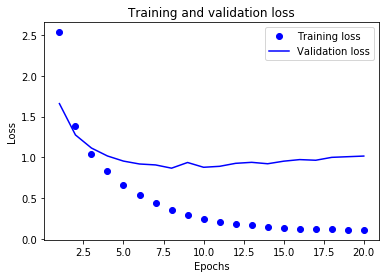

In [33]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
      
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
      
plt.show()

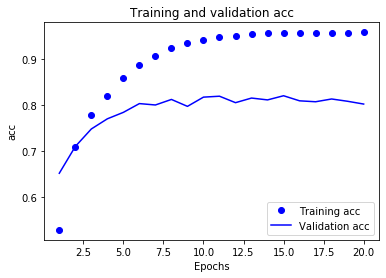

In [34]:
#훈련과 검증정확도 그리기
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
      
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
      
plt.show()

In [35]:
# 에포크 9부터 과대적합
#모델 다시 훈련

model.fit(partial_x_val,partial_y_val,
                 epochs=9,
                 batch_size=512,
                 validation_data=[x_val,y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 541us/step - loss: 0.1066 - acc: 0.9588 - val_loss: 1.0444 - val_acc: 0.8110
Epoch 2/9
7982/7982 [==============================] - 4s 540us/step - loss: 0.1041 - acc: 0.9584 - val_loss: 1.0680 - val_acc: 0.8020
Epoch 3/9
7982/7982 [==============================] - 5s 574us/step - loss: 0.1053 - acc: 0.9577 - val_loss: 1.0511 - val_acc: 0.8030
Epoch 4/9
7982/7982 [==============================] - 4s 541us/step - loss: 0.1051 - acc: 0.9570 - val_loss: 1.0708 - val_acc: 0.8020
Epoch 5/9
7982/7982 [==============================] - 4s 529us/step - loss: 0.0997 - acc: 0.9577 - val_loss: 1.0955 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 4s 534us/step - loss: 0.1011 - acc: 0.9563 - val_loss: 1.1395 - val_acc: 0.7910
Epoch 7/9
7982/7982 [==============================] - 4s 546us/step - loss: 0.0996 - acc: 0.9583 - val_loss: 1.1002 - val_acc: 0.8060
Epoch 8

In [36]:
#테스트 셋 예측평가
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 2s 795us/step


In [37]:
results#약 78퍼 정확

[1.3416993119094591, 0.7764915405164737]

In [12]:
'''
회귀문제-> 주택가격예측
'''
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [7]:
train_data.shape

(404, 13)

In [14]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [16]:
#데이터 정규화
#이전 분류문제는 한 샘플을 많은 차원의 벡터로 원핫 인코딩
#원핫 인코딩 회귀문제에 적합하지 않음
#따라서 각 특성이 표준정규분포를 따르게 하자.(n(0,1))
#이유는 각 특성의 값이 너무 상이하면 훈련이 잘 안됌

mean=train_data.mean(axis=0)# 특성별 평균 구함Q.시퀀스 행렬이면 axis=1??
train_data-=mean#각 특성에 평균 빼줌
std=train_data.std(axis=0)#각 특성별 std구함
train_data /= std # 표준편차 나눠줌

#테스트 데이터는 훈련 데이터를 가지고 데이터 정규화 해준다.
#테스트 데이터는 건들이면 안되므로
test_data-=mean
test_data /= std

In [27]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))#활성화 함수 없다+하나의 유닛=> 스칼라회귀문제
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    #손실함수는 평균 제곱오차 평가기준은 평균 절대오차 => 스칼라 회귀의 전형적인 공식
    
    return model
    

In [32]:
#검증세트분할 경우의 수에 대해  검증점수의 분산이 높다.
# 이럴 때 k-겹 교차검증

import numpy as np
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_mae_histories=[]
for i in range(k):
    print("처리중인 폴드#",i)
    
    #검증데이터 준비
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    #검증데이터 외는 훈련데이터로 준비
    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
         axis=0)#행기준으로 붙여라 그니까 A행렬 믿에 B행렬을 붙이라는 말 즉
         #열을 그대로 행이 늘어나는 구조
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
         axis=0)
    model=build_model() # 케라스 모델 구성+ 모델 컴파일
    history=model.fit(partial_train_data,partial_train_targets,
             epochs=num_epochs,batch_size=1,verbose=0,
             validation_data=(val_data,val_targets))#Q사실상 확률적경사하강법 아닌 그냥 경사하강법하겠다는 말
    
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드# 0
처리중인 폴드# 1
처리중인 폴드# 2
처리중인 폴드# 3


In [33]:
#epoch 500을하라는데 시간 오래걸려서 패스

In [35]:
#k겹 검증점수 평균을 기록하기
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

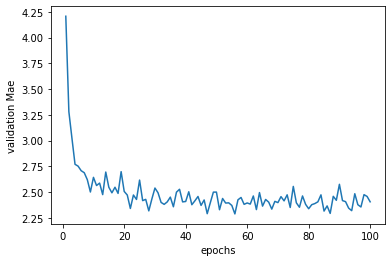

In [39]:
#검증 점수 그리기
#기존 그래프와 달리 partial_train 데이터의 epoch당 mae는 출력하지 않는다.=> k-겹검증의 평균이므로
#다른 기준 선이 필요없이 하나의 var평균 선으로도 충분히 데이터 과대적합 했는지 표현 가능하기 떄문인것 같음
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)#plot에 표시할 데이터 (x,y)좌표
plt.xlabel("epochs")
plt.ylabel("validation Mae")
plt.show()

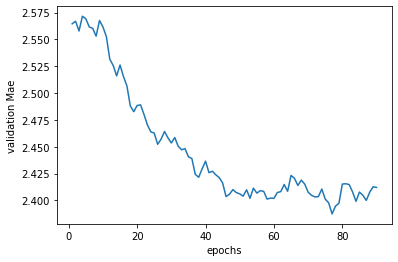

In [46]:
#이 그래프는 변동이 심하기 때매 어디가 과대적합인지 보기 힘들다
#앞의 10개 그래프 기존 그래프와 너무 차이 나므로 날려준다.
#각 포인트를 이전 포인트의 지수이동평균으로 대체=> 완만한 그래프!!!!

def smooth_curve(points,factors=0.9):
    smooth_points=[]
    for point in points:
        if smooth_points: #smooth_points 리스트가 빈리스트가 아닐 때
            previous=smooth_points[-1]
            smooth_points.append(previous*factors+point*(1-factors)) #현.포=전 포인트의 90퍼센트+현 포인트 10퍼센트
        else:
            smooth_points.append(point)
    return smooth_points

smooth_mae_history=smooth_curve(average_mae_history[10:]) #앞의 열개 데이터 날림
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)#plot에 표시할 데이터 (x,y)좌표
plt.xlabel("epochs")
plt.ylabel("validation Mae")
plt.show()

In [48]:
#교재에는 500까지 epoch가 있는데 그래프가 다르다 교재 보면 80번째 에포크가 최상!!
#토대로 최종 모델 훈련
model=build_model()
model.fit(train_data,train_targets,
         epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 2ms/step


In [49]:
test_mae_score

2.92810739255419